In [1]:
from pylab import *
from matplotlib import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as pyplot
import numpy as np


In [4]:
t = arange(0,6.0,0.2)
y = array([398,344,306,252,250,220,159,154,140,131,126,108,85,91,73,54,66,58,54,
34,44,33,23,24,28,24,17,12,13,13])
sy = sqrt(y);

In [5]:
#Define function
def myfitfn(t,b,A):
    return A*exp(-b*t)

In [6]:
pguess = [0.60419973,394.74];
p,cov = curve_fit(myfitfn,t,y,sigma=sy,p0=pguess);
print(p)
print(sqrt(cov))

[  0.59307932 381.05512674]
[[0.01229459 0.2852025 ]
 [0.2852025  9.04042133]]


In [7]:
b,A = p;
yfit = A*exp(-b*t);

ydif = yfit - y;
sesquare = sy**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(y) - 2;
normchi = chi / DOF;
print(normchi)

0.865217399728344


Text(0, 0.5, 'y')

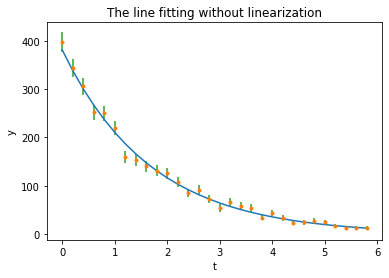

In [6]:
plot(t,yfit)
plot(t,y,'.')
errorbar(t,y,sy, fmt='none');

pyplot.title('The line fitting without linearization')
pyplot.xlabel('t')
pyplot.ylabel('y')

Text(0, 0.5, 'counts')

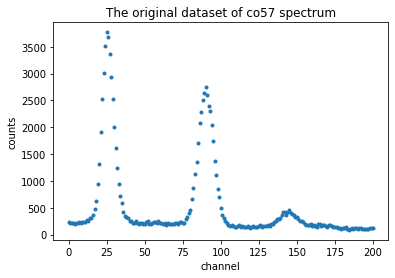

In [8]:
#Load datapoints
w = np.loadtxt("co57.txt", delimiter=",");
channel = w[:,0] # channel
counts = w[:,1] # counts

plot(channel,counts,'.')

pyplot.title('The original dataset of co57 spectrum')
pyplot.xlabel('channel')
pyplot.ylabel('counts')

Text(0, 0.5, 'counts')

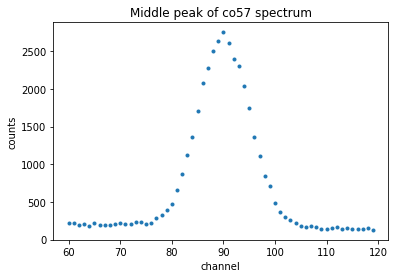

In [9]:
midchan = channel[60:120];
midcounts = counts[60:120];
plot(midchan,midcounts,'.')
pyplot.title('Middle peak of co57 spectrum')
pyplot.xlabel('channel')
pyplot.ylabel('counts')

[90, 7, 2650, -0.5, 200]


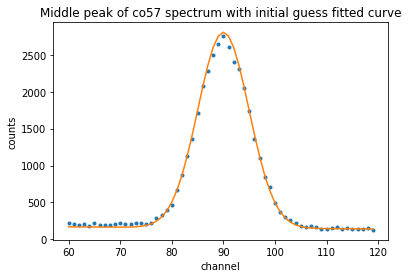

In [11]:
#Define function for curve fit
def peakfit(x,x0,d,A,b,c):
    return A*exp(-(x-x0)**2/d**2)+(b*x+c);

#Initial guess list
sy = sqrt(midcounts);
A = 2650;
x0 = 90;
d = 7;
b = -0.5; #should be negative
c = 200;
x = midchan;
pguess = [x0,d,A,b,c];
y = A*exp(-(x-x0)**2/d**2)+(c+b*x);

#Plot the curve against the dots
plot(midchan,midcounts,'.')
plot(x,y)
pyplot.title('Middle peak of co57 spectrum with initial guess fitted curve')
pyplot.xlabel('channel')
pyplot.ylabel('counts')
print(pguess)

[ 9.00398910e+01  7.01163901e+00  2.52788650e+03 -1.19395991e+00
  2.82967143e+02]
[ 0.03207855  0.03980637 18.40813234  0.09953159  9.49328888]


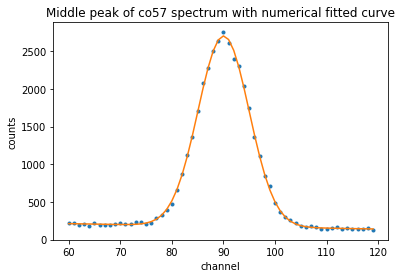

In [12]:
#curvefit function run
p,cov = curve_fit(peakfit,midchan,midcounts,sigma = sy, p0 = pguess);
y = p[2]*exp(-(x-p[0])**2/p[1]**2)+(p[4]+p[3]*x);

#Plot the curve against the dots
plot(midchan,midcounts,'.')
plot(x,y)
pyplot.title('Middle peak of co57 spectrum with numerical fitted curve')
pyplot.xlabel('channel')
pyplot.ylabel('counts')
print(p)
error = sqrt(np.diagonal(cov, offset=0, axis1=0, axis2=1))
print(error)
#p vector = [x0,d,A,b,c] = [ 9.00398910e+01  7.01163901e+00  2.52788649e+03 -1.19395994e+00 2.82967145e+02] = [90.040 7.012 2.528 -1.194 2.830];
#correspondance error vector = [x0,d,A,b,c] = [ 0.03207855  0.03980637 18.40813235  0.09953158  9.49328891];

In [13]:
#Chi-squared value
ydif = midcounts - y;
sesquare = sy**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(midcounts) - 5;
normchi = chi / DOF;
print(normchi)

0.9354878091886315


In [14]:
#Fit with three peak:
w = np.loadtxt("co57.txt", delimiter=",");
channel = w[:,0] # channel
counts = w[:,1] # counts
#Define function for curve fit
def peakfitALL3(x,A0,x0,d0,A1,x1,d1,A2,x2,d2,b,c):
    return A0*exp(-(x-x0)**2/d0**2)+A1*exp(-(x-x1)**2/d1**2)+A2*exp(-(x-x2)**2/d2**2)+(b*x+c);

Text(0, 0.5, 'counts')

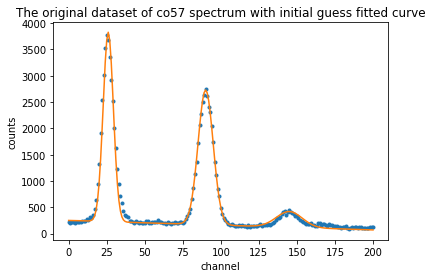

In [16]:
#Fit with three peak manual input:
x = channel;  #transfer channel variable to x variable
sy = sqrt(counts);
A0 = 3600;
x0 = 26;
d0 = 4.75; #first peak
A1 = 2560;
x1 = 90;
d1 = 7.01; #second peak
A2 = 300;
x2 = 145;
d2 = 12; # third peak
b = -0.9;
c = 250;
pguess = [A0,x0,d0,A1,x1,d1,A2,x2,d2,b,c];
y = A0*exp(-(x-x0)**2/d0**2)+A1*exp(-(x-x1)**2/d1**2)+A2*exp(-(x-x2)**2/d2**2)+(b*x+c);
plot(channel,counts,'.')
plot(x,y,'-')
pyplot.title('The original dataset of co57 spectrum with initial guess fitted curve')
pyplot.xlabel('channel')
pyplot.ylabel('counts')

[ 3.39442492e+03  2.58100323e+01  5.63990302e+00  2.52778210e+03
  9.00105236e+01  6.96066840e+00  2.64885578e+02  1.44641774e+02
  8.64650100e+00 -6.35644270e-01  2.40498963e+02]
[4.39871354e+01 4.47256471e-02 5.47806344e-02 3.40504709e+01
 5.84169857e-02 6.98942336e-02 1.27700686e+01 2.93902158e-01
 4.05202431e-01 3.36636642e-02 4.56579098e+00]


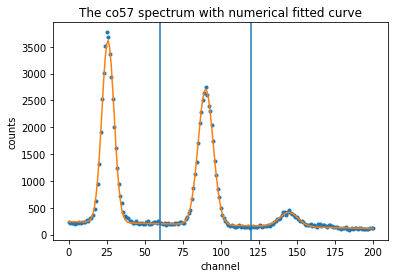

In [17]:
p,cov = curve_fit(peakfitALL3,channel,counts,sigma = sy, p0 = pguess);
y = p[0]*exp(-(x-p[1])**2/p[2]**2)+p[3]*exp(-(x-p[4])**2/p[5]**2)+p[6]*exp(-(x-p[7])**2/p[8]**2)+(p[9]*x+p[10]);

#Plot the curve against the dots
plot(channel,counts,'.')
plot(x,y)
pyplot.title('The co57 spectrum with numerical fitted curve')
pyplot.xlabel('channel')
pyplot.ylabel('counts')
pyplot.axvline(x=60)
pyplot.axvline(x=120)
print(p)
error = sqrt(np.diagonal(cov, offset=0, axis1=0, axis2=1))
print(error)
#p vector = [A0,x0,d0,A1,x1,d1,A2,x2,d2,b,c] = [ 3.39442484e+03  2.58100324e+01  5.63990317e+00  2.52778210e+03
#  9.00105236e+01  6.96066842e+00  2.64885571e+02  1.44641774e+02
#  8.64650145e+00 -6.35644257e-01  2.40498960e+02]
#correspondance error vector = [A0,x0,d0,A1,x1,d1,A2,x2,d2,b,c] = [4.39871295e+01 4.47256517e-02 5.47806403e-02 3.40504708e+01
# 5.84169855e-02 6.98942333e-02 1.27700672e+01 2.93902198e-01
# 4.05202499e-01 3.36636650e-02 4.56579110e+00];

In [18]:
#Chi-squared value
ydif = counts - y;
sesquare = sy**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
element = element[120:200];
chi = sum(element);
DOF = len(element) - 5;
normchi = chi / DOF;
print(normchi)

2.645428971605998


Text(0, 0.5, 'counts')

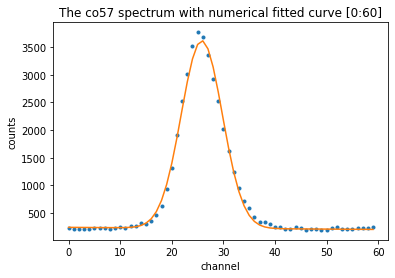

In [20]:
plot(channel[0:60],counts[0:60],'.')
plot(x[0:60],y[0:60])
pyplot.title('The co57 spectrum with numerical fitted curve [0:60]')
pyplot.xlabel('channel')
pyplot.ylabel('counts')

Text(0, 0.5, 'counts')

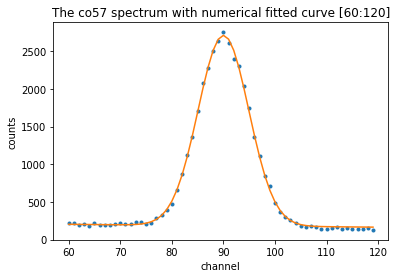

In [21]:
plot(channel[60:120],counts[60:120],'.')
plot(x[60:120],y[60:120])
pyplot.title('The co57 spectrum with numerical fitted curve [60:120]')
pyplot.xlabel('channel')
pyplot.ylabel('counts')

Text(0, 0.5, 'counts')

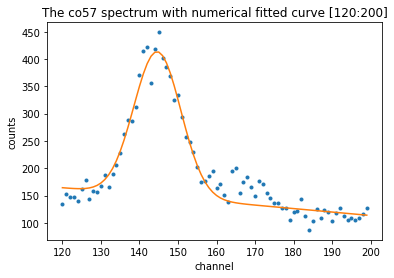

In [22]:
plot(channel[120:200],counts[120:200],'.')
plot(x[120:200],y[120:200])
pyplot.title('The co57 spectrum with numerical fitted curve [120:200]')
pyplot.xlabel('channel')
pyplot.ylabel('counts')

[3400, 25.7, 5.6, 0.3, 225]


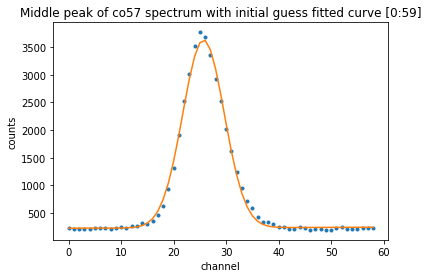

In [24]:
#fitting the first half
#Define function for curve fit
def peakfit(x,A,x0,d,b,c):
    return A*exp(-(x-x0)**2/d**2)+(b*x+c);
x = channel[0:59];
ydata = counts[0:59];
#Initial guess list
sy = sqrt(ydata);
A = 3400;
x0 = 25.7;
d = 5.6;
b = 0.3; #should be negative
c = 225;
pguess = [A,x0,d,b,c];
y = A*exp(-(x-x0)**2/d**2)+(c+b*x);

#Plot the curve against the dots
plot(x,ydata,'.')
plot(x,y)
pyplot.title('Middle peak of co57 spectrum with initial guess fitted curve [0:59]')
pyplot.xlabel('channel')
pyplot.ylabel('counts')
print(pguess)



[3.39544472e+03 2.57934412e+01 5.63140899e+00 1.63865539e-02
 2.25569340e+02]
[54.50438855  0.05569294  0.06886566  0.2599903   9.83698061]
[3.39544472e+03 2.57934412e+01 5.63140899e+00 1.63865539e-02
 2.25569340e+02]
[54.50438855  0.05569294  0.06886566  0.2599903   9.83698061]
4.852537837755817


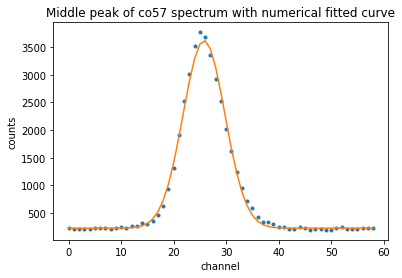

In [25]:
#curvefit function run [order:A,x0,d,b,c]
p,cov = curve_fit(peakfit,x,ydata,sigma = sy, p0 = pguess);
y = p[0]*exp(-(x-p[1])**2/p[2]**2)+(p[4]+p[3]*x);

#Plot the curve against the dots
plot(x,ydata,'.')
plot(x,y)
pyplot.title('Middle peak of co57 spectrum with numerical fitted curve')
pyplot.xlabel('channel')
pyplot.ylabel('counts')
print(p)
error = sqrt(np.diagonal(cov, offset=0, axis1=0, axis2=1))
print(error)

#Chi-squared value 
ydif = ydata - y;
sesquare = sy**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 5;
normchi = chi / DOF;

print(p)
error = sqrt(np.diagonal(cov, offset=0, axis1=0, axis2=1))
print(error)
print(normchi)
#p vector: [A,x0,d,b,c] = [3.39544472e+03 2.57934410e+01 5.63140915e+00 1.63937816e-02 2.25569114e+02]
#error vector: [A,x0,d,b,c] = [3.39544472e+03 2.57934410e+01 5.63140915e+00 1.63937816e-02 2.25569114e+02]

Text(0, 0.5, 'counts')

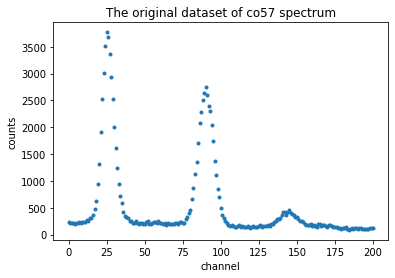

In [23]:
#log scale step (step 9)
#Load datapoints
w = np.loadtxt("co57.txt", delimiter=",");
channel = w[:,0] # channel
counts = w[:,1] # counts

plot(channel,counts,'.')

pyplot.title('The original dataset of co57 spectrum')
pyplot.xlabel('channel')
pyplot.ylabel('counts')


Text(0, 0.5, 'ln(counts)')

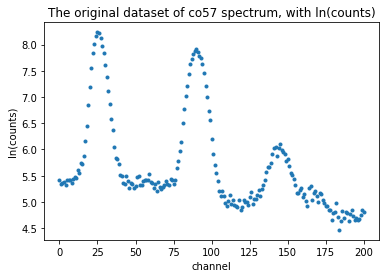

In [24]:
lncount = log(counts);
plot(channel,lncount,'.');

pyplot.title('The original dataset of co57 spectrum, with ln(counts)')
pyplot.xlabel('channel')
pyplot.ylabel('ln(counts)')

[-1.76405194e-02  3.17349396e+00 -1.34838879e+02]
[2.03446229e-04 3.63765172e-02 1.61919893e+00]
Normalized chi-squared: 0.9519788420690165
--------------------------NEXT--------------------------------
[-5.99602215e-03  1.73011455e+00 -1.18820678e+02]
[2.23456968e-04 6.43462577e-02 4.61956853e+00]
Normalized chi-squared: 1.3565402295593818
--------------------------NEXT--------------------------------
[-2.80085575e-03  9.32414205e-01 -7.24497187e+01]
[6.74486182e-04 2.29015157e-01 1.94202806e+01]
Normalized chi-squared: 1.428973541773174
--------------------------NEXT--------------------------------
[ -0.02881027   1.48389418 -10.91659995]
[0.00113797 0.05930778 0.75435029]
Normalized chi-squared: 7.799982204113432
--------------------------NEXT--------------------------------


Text(0, 0.5, 'ln(counts)')

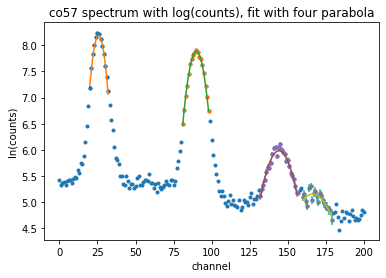

In [25]:
#Include entire
plot(channel,lncount,'.');
#Error conversion
sy = sqrt(counts);
slny = sy/counts;

#Separate plot into four region
#plot(channel[21:30],lncount[21:30],'.')
#plot(channel[81:99],lncount[81:99],'.')
#plot(channel[132:157],lncount[132:157],'.')
#plot(channel[160:180],lncount[160:180],'.')

#Fit each curve
ran = np.arange(81,99,1);
x = channel[ran];
ydata = lncount[ran];
e = slny[ran]
p,sp = polyfit(x,ydata,2,w=e,cov = True)
y = p[0]*(x**2)+p[1]*(x**1)+p[2];
plot(x,ydata,'.')
plot(x,y)
errorbar(x,ydata,e, fmt='none');
print(p)
error = sqrt(np.diagonal(sp, offset=0, axis1=0, axis2=1))
print(error)
#Chi-squared value 
ydif = ydata - y;
sesquare = e**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 3;
normchi = chi / DOF;
p2 = p;
print("Normalized chi-squared:",normchi)
print('--------------------------NEXT--------------------------------')
#Same code is replicated to fit four curves

ran = np.arange(132,157,1);
x = channel[ran];
ydata = lncount[ran];
e = slny[ran]
p,sp = polyfit(x,ydata,2,w=e,cov = True)
y = p[0]*(x**2)+p[1]*(x**1)+p[2];
plot(x,ydata,'.')
plot(x,y)
errorbar(x,ydata,e, fmt='none');
print(p)
error = sqrt(np.diagonal(sp, offset=0, axis1=0, axis2=1))
print(error)
#Chi-squared value 
ydif = ydata - y;
sesquare = e**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 3;
normchi = chi / DOF;
print("Normalized chi-squared:",normchi)
p3 = p;
print('--------------------------NEXT--------------------------------')

ran = np.arange(160,180,1);
x = channel[ran];
ydata = lncount[ran];
e = slny[ran]
p,sp = polyfit(x,ydata,2,w=e,cov = True)
y = p[0]*(x**2)+p[1]*(x**1)+p[2];
plot(x,ydata,'.')
plot(x,y)
errorbar(x,ydata,e, fmt='none');
print(p)
error = sqrt(np.diagonal(sp, offset=0, axis1=0, axis2=1))
print(error)
#Chi-squared value 
ydif = ydata - y;
sesquare = e**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 3;
normchi = chi / DOF;
print("Normalized chi-squared:",normchi)
p4 = p;
print('--------------------------NEXT--------------------------------')
ran = np.arange(20,33,1);
x = channel[ran];
ydata = lncount[ran];
e = slny[ran]
p,sp = polyfit(x,ydata,2,w=e,cov = True)
y = p[0]*(x**2)+p[1]*(x**1)+p[2];
plot(x,ydata,'.')
plot(x,y)
errorbar(x,ydata,e, fmt='none');
print(p)
error = sqrt(np.diagonal(sp, offset=0, axis1=0, axis2=1))
print(error)
#Chi-squared value 
ydif = ydata - y;
sesquare = e**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 3;
normchi = chi / DOF;
print("Normalized chi-squared:",normchi)
p1 = p;
print('--------------------------NEXT--------------------------------')
pyplot.title('co57 spectrum with log(counts), fit with four parabola')
pyplot.xlabel('channel')
pyplot.ylabel('ln(counts)')

Text(0, 0.5, 'counts')

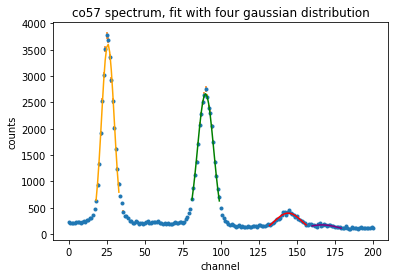

In [32]:
#map back to gaussian peak
#Separate plot into four region
#plot(channel[21:30],lncount[21:30],'.')
#plot(channel[81:99],lncount[81:99],'.')
#plot(channel[132:157],lncount[132:157],'.')
#plot(channel[160:180],lncount[160:180],'.')

#Include entire
plot(channel,counts,'.');
sy = sqrt(counts)
errorbar(channel,counts,sy, fmt='none');
x = channel;
#ran1 = np.arange(19,33,1);
#ran2 = np.arange(81,100,1);
#ran3 = np.arange(132,157,1);
#ran4 = np.arange(160,178,);
ran1 = np.arange(18,34,1);
ran2 = np.arange(81,100,1);
ran3 = np.arange(132,157,1);
ran4 = np.arange(160,180,1);
y1 = exp(p1[0]*(x[ran1]**2)+p1[1]*(x[ran1]**1)+p1[2]);
y2 = exp(p2[0]*(x[ran2]**2)+p2[1]*(x[ran2]**1)+p2[2]);
y3 = exp(p3[0]*(x[ran3]**2)+p3[1]*(x[ran3]**1)+p3[2]);
y4 = exp(p4[0]*(x[ran4]**2)+p4[1]*(x[ran4]**1)+p4[2]);

plot(x[ran1],y1,'orange');
plot(x[ran2],y2,'green');
plot(x[ran3],y3,'red');
plot(x[ran4],y4,'purple');

pyplot.title('co57 spectrum, fit with four gaussian distribution')
pyplot.xlabel('channel')
pyplot.ylabel('counts')

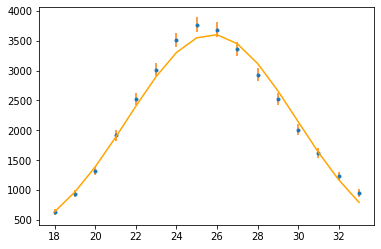

In [36]:
plot(channel[ran1],counts[ran1],'.');
sy = sqrt(counts)
errorbar(channel[ran1],counts[ran1],2*sy[ran1], fmt='none');
plot(x[ran1],y1,'orange');

In [39]:
#chi-squared value calculation:
ydata = counts[ran1];
sy = sqrt(counts);
e = 2*sy[ran1];
ydif = ydata - y1;
sesquare = e**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 3;
normchi = chi / DOF;
print(normchi)

ydata = counts[ran2];
sy = sqrt(counts);
e = sy[ran2];
ydif = ydata - y2;
sesquare = e**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 3;
normchi = chi / DOF;
print(normchi)

ydata = counts[ran3];
sy = sqrt(counts);
e = sy[ran3];
ydif = ydata - y3;
sesquare = e**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 3;
normchi = chi / DOF;
print(normchi)

ydata = counts[ran4];
sy = sqrt(counts);
e = sy[ran4];
ydif = ydata - y4;
sesquare = e**2; #In this case, since the number of sample is 1, the standard error of mean for each point equals to the standard deviation
element = (ydif)**2/sesquare;
chi = sum(element);
DOF = len(ydata) - 3;
normchi = chi / DOF;
print(normchi)

2.0053127678107736
1.435036074450968
1.3157424807570957
1.4307083543079413


In [27]:
print(p1)
print(p2)
print(p3)
print(p4)

[ -0.02881027   1.48389418 -10.91659995]
[-1.76405194e-02  3.17349396e+00 -1.34838879e+02]
[-5.99602215e-03  1.73011455e+00 -1.18820678e+02]
[-2.80085575e-03  9.32414205e-01 -7.24497187e+01]


In [28]:
#Straight calculation
p = p2;
d = sqrt(-1/p[0]);
x0 = -1*(d**2)*p[1]/2;
A = exp(p[2]+(x0**2)/(d**2));
parameter = [A,x0,d];
parameter[1] = parameter[1]*-1;
print(parameter)

[2663.552621168485, 89.94899443402001, 7.529121682784479]


[2671.78135692   89.99609614    7.54696265]
[22.30885051  0.03999828  0.06152542]


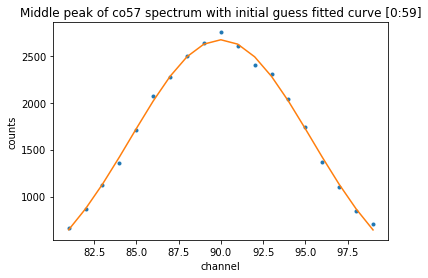

In [335]:
#Fit gaussian curve to the theoretical curve
#fitting the first half
#Define function for curve fit
p = p2;
d = sqrt(-1/p[0]);
x0 = -1*(d**2)*p[1]/2;
A = exp(p[2]+(x0**2)/(d**2));
parameter = [A,x0,d];
parameter[1] = parameter[1]*-1;
def peakfit(x,A,x0,d):
    return A*exp(-(x-x0)**2/d**2);
#ran1 = np.arange(18,34,1);
#ran2 = np.arange(81,100,1);
#ran3 = np.arange(132,157,1);
#ran4 = np.arange(160,180,1);
x = channel[ran2];
ydata = counts[ran2]
#Initial guess list
sy = sqrt(ydata);
pguess = parameter;
p,cov = curve_fit(peakfit,x,ydata,sigma = sy, p0 = pguess);
y = p[0]*exp(-(x-p[1])**2/p[2]**2);
print(p)
#Plot the curve against the dots
plot(x,ydata,'.')
plot(x,y)
pyplot.title('Middle peak of co57 spectrum with initial guess fitted curve [0:59]')
pyplot.xlabel('channel')
pyplot.ylabel('counts')
error = sqrt(np.diagonal(cov, offset=0, axis1=0, axis2=1))
print(error)